In [0]:
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np
import pandas as pd
import time
import random

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Building Strategy

### Define SoftMax Function

In [0]:
def softmax(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis]
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis]
    return e_x / div

### Collecting Stock data for training (31 stocks from SP500)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
start=datetime.datetime(2019,1,1)
end=datetime.date.today()
microsoft=web.DataReader("MSFT","yahoo",start,end)
microsoft.to_csv('msft.csv')
df=pd.read_csv('msft.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,99.375191
1,2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,95.719376
2,2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,100.171211
3,2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,100.298965
4,2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,101.026199
...,...,...,...,...,...,...,...
332,2020-04-28,175.669998,169.389999,175.589996,169.809998,34392700.0,169.809998
333,2020-04-29,177.679993,171.880005,173.220001,177.429993,51286600.0,177.429993
334,2020-04-30,180.399994,176.229996,180.000000,179.210007,53875900.0,179.210007
335,2020-05-01,178.639999,174.009995,175.800003,174.570007,39311700.0,174.570007


In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
start=datetime.datetime(2019,1,1)
end=datetime.date.today()
nvr=web.DataReader("NVR","yahoo",start,end)
nvr.to_csv('nvr.csv')
bkng=web.DataReader("BKNG","yahoo",start,end)
bkng.to_csv('bkng.csv')
amzn=web.DataReader("AMZN","yahoo",start,end)
amzn.to_csv('amzn.csv')
goog=web.DataReader("GOOG","yahoo",start,end)
goog.to_csv('goog.csv')
fb=web.DataReader("FB","yahoo",start,end)
fb.to_csv('fb.csv')
msft=web.DataReader("MSFT","yahoo",start,end)
msft.to_csv('msft.csv')


nvr=web.DataReader("NVR","yahoo",start,end)
nvr.to_csv('nvr.csv')
bkng=web.DataReader("BKNG","yahoo",start,end)
bkng.to_csv('bkng.csv')
amzn=web.DataReader("AMZN","yahoo",start,end)
amzn.to_csv('amzn.csv')
goog=web.DataReader("GOOG","yahoo",start,end)
goog.to_csv('goog.csv')
fb=web.DataReader("FB","yahoo",start,end)
fb.to_csv('fb.csv')
msft=web.DataReader("MSFT","yahoo",start,end)
msft.to_csv('msft.csv')



In [0]:
tsla=web.DataReader("TSLA","yahoo",start,end)
tsla.to_csv('tsla.csv')
azo=web.DataReader("AZO","yahoo",start,end)
azo.to_csv('azo.csv')
re=web.DataReader("RE","yahoo",start,end)
re.to_csv('re.csv')
mtd=web.DataReader("MTD","yahoo",start,end)
mtd.to_csv('mtd.csv')
lmt=web.DataReader("LMT","yahoo",start,end)
lmt.to_csv('lmt.csv')
gs=web.DataReader("GS","yahoo",start,end)
gs.to_csv('gs.csv')

In [0]:
nrg=web.DataReader("NRG","yahoo",start,end)
nrg.to_csv('nrg.csv')
shw=web.DataReader("SHW","yahoo",start,end)
shw.to_csv('shw.csv')
vno=web.DataReader("VNO","yahoo",start,end)
vno.to_csv('vno.csv')
gww=web.DataReader("GWW","yahoo",start,end)
gww.to_csv('gww.csv')
uri=web.DataReader("URI","yahoo",start,end)
uri.to_csv('uri.csv')
unh=web.DataReader("UNH","yahoo",start,end)
unh.to_csv('unh.csv')


In [0]:

nov=web.DataReader("NOV","yahoo",start,end)
nov.to_csv('nov.csv')
cah=web.DataReader("CAH","yahoo",start,end)
cah.to_csv('cah.csv')
apa=web.DataReader("APA","yahoo",start,end)
apa.to_csv('apa.csv')
slb=web.DataReader("SLB","yahoo",start,end)
slb.to_csv('slb.csv')
dxc=web.DataReader("DXC","yahoo",start,end)
dxc.to_csv('dxc.csv')


In [0]:
fti=web.DataReader("FTI","yahoo",start,end)
fti.to_csv('fti.csv')
mck=web.DataReader("MCK","yahoo",start,end)
mck.to_csv('mck.csv')
ctl=web.DataReader("CTL","yahoo",start,end)
ctl.to_csv('ctl.csv')
wdc=web.DataReader("WDC","yahoo",start,end)
wdc.to_csv('wdc.csv')
coty=web.DataReader("COTY","yahoo",start,end)
coty.to_csv('coty.csv')
cxo=web.DataReader("CXO","yahoo",start,end)
cxo.to_csv('cxo.csv')


### Define Parameters used 

In [0]:
parameters = [df['Close'].tolist(), df['Volume'].tolist()]

In this strategy, we only use ``Close`` and ``Volume`` as paramters from the stock dataframe

### Define Get_State function

In [0]:
# Here we use window_size as 20 days 
def get_state(parameters, t, window_size = 20):
    outside = []
    d = t - window_size + 1
    for parameter in parameters:
        block = (
            parameter[d : t + 1]
            if d >= 0
            else -d * [parameter[0]] + parameter[0 : t + 1]
        )
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        for i in range(1, window_size, 1):
            res.append(block[i] - block[0])
        outside.append(res)
    return np.array(outside).reshape((1, -1))
# the resulting output size for this function is 38

We will add another parameters, i.e 
``inventory_size`` = 1,
``mean_inventory`` = 0.5,
``capital`` = 2,
``last_state`` = 0

In [0]:
inventory_size = 1
mean_inventory = 0.5
capital = 2
concat_parameters = np.concatenate([get_state(parameters, 20), [[inventory_size, 
                                                                mean_inventory,
                                                                capital]]], axis = 1)

In [0]:

input_size = concat_parameters.shape[1]
input_size

79

### Define main Evolution strategy 

In [0]:
class Deep_Evolution_Strategy:

    inputs = None

    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights
    
    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / (np.std(rewards) + 1e-7)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')
        
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.rand(input_size, layer_size)
            * np.sqrt(1 / (input_size + layer_size)),
            np.random.rand(layer_size, output_size)
            * np.sqrt(1 / (layer_size + output_size)),
            np.zeros((1, layer_size)),
            np.zeros((1, output_size)),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-2]
        decision = np.dot(feed, self.weights[1]) + self.weights[-1]
        return decision

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

### Trading agent function

we will use 3 actions, namely, ``0 for do nothing``,``1 for buy``,``2 for sell``.

In [0]:
class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(self, model, timeseries, skip, initial_money, real_trend, minmax):
        self.model = model
        self.timeseries = timeseries
        self.skip = skip
        self.real_trend = real_trend
        self.initial_money = initial_money
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )
        self.minmax = minmax
        self._initiate()

    def _initiate(self):
        # i assume first index is the close value
        self.trend = self.timeseries[0]
        self._mean = np.mean(self.trend)
        self._std = np.std(self.trend)
        self._inventory = []
        self._capital = self.initial_money
        self._queue = []
        self._scaled_capital = self.minmax.transform([[self._capital, 2]])[0, 0]

    def reset_capital(self, capital):
        if capital:
            self._capital = capital
        self._scaled_capital = self.minmax.transform([[self._capital, 2]])[0, 0]
        self._queue = []
        self._inventory = []

    def trade(self, data):
        """
        you need to make sure the data is [close, volume]
        """
        scaled_data = self.minmax.transform([data])[0]
        real_close = data[0]
        close = scaled_data[0]
        if len(self._queue) >= window_size:
            self._queue.pop(0)
        self._queue.append(scaled_data)
        if len(self._queue) < window_size:
            return {
                'status': 'data not enough to trade',
                'action': 'fail',
                'balance': self._capital,
                'timestamp': str(datetime.now()),
            }
        state = self.get_state(
            window_size - 1,
            self._inventory,
            self._scaled_capital,
            timeseries = np.array(self._queue).T.tolist(),
        )
        action, prob = self.act_softmax(state)
        print(prob)
        if action == 1 and self._scaled_capital >= close:
            self._inventory.append(close)
            self._scaled_capital -= close
            self._capital -= real_close
            return {
                'status': 'buy 1 unit, cost %f' % (real_close),
                'action': 'buy',
                'balance': self._capital,
                'timestamp': str(datetime.now()),
            }
        elif action == 2 and len(self._inventory):
            bought_price = self._inventory.pop(0)
            self._scaled_capital += close
            self._capital += real_close
            scaled_bought_price = self.minmax.inverse_transform(
                [[bought_price, 2]]
            )[0, 0]
            try:
                invest = (
                    (real_close - scaled_bought_price) / scaled_bought_price
                ) * 100
            except:
                invest = 0
            return {
                'status': 'sell 1 unit, price %f' % (real_close),
                'investment': invest,
                'gain': real_close - scaled_bought_price,
                'balance': self._capital,
                'action': 'sell',
                'timestamp': str(datetime.now()),
            }
        else:
            return {
                'status': 'do nothing',
                'action': 'nothing',
                'balance': self._capital,
                'timestamp': str(datetime.now()),
            }

    def change_data(self, timeseries, skip, initial_money, real_trend, minmax):
        self.timeseries = timeseries
        self.skip = skip
        self.initial_money = initial_money
        self.real_trend = real_trend
        self.minmax = minmax
        self._initiate()

    def act(self, sequence):
        decision = self.model.predict(np.array(sequence))

        return np.argmax(decision[0])

    def act_softmax(self, sequence):
        decision = self.model.predict(np.array(sequence))

        return np.argmax(decision[0]), softmax(decision)[0]

    def get_state(self, t, inventory, capital, timeseries):
        state = get_state(timeseries, t)
        len_inventory = len(inventory)
        if len_inventory:
            mean_inventory = np.mean(inventory)
        else:
            mean_inventory = 0
        z_inventory = (mean_inventory - self._mean) / self._std
        z_capital = (capital - self._mean) / self._std
        concat_parameters = np.concatenate(
            [state, [[len_inventory, z_inventory, z_capital]]], axis = 1
        )
        return concat_parameters

    def get_reward(self, weights):
        initial_money = self._scaled_capital
        starting_money = initial_money
        invests = []
        self.model.weights = weights
        inventory = []
        state = self.get_state(0, inventory, starting_money, self.timeseries)

        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            if action == 1 and starting_money >= self.trend[t]:
                inventory.append(self.trend[t])
                starting_money -= self.trend[t]

            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                starting_money += self.trend[t]
                invest = ((self.trend[t] - bought_price) / bought_price) * 100
                invests.append(invest)

            state = self.get_state(
                t + 1, inventory, starting_money, self.timeseries
            )
        invests = np.mean(invests)
        if np.isnan(invests):
            invests = 0
        score = (starting_money - initial_money) / initial_money * 100
        return invests * 0.7 + score * 0.3

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self._scaled_capital
        starting_money = initial_money

        real_initial_money = self.initial_money
        real_starting_money = self.initial_money
        inventory = []
        real_inventory = []
        state = self.get_state(0, inventory, starting_money, self.timeseries)
        states_sell = []
        states_buy = []

        for t in range(0, len(self.trend) - 1, self.skip):
            action, prob = self.act_softmax(state)
            print(t, prob)

            if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - 1 - window_size):
                inventory.append(self.trend[t])
                real_inventory.append(self.real_trend[t])
                real_starting_money -= self.real_trend[t]
                starting_money -= self.trend[t]
                states_buy.append(t)
                print(
                    'day %d: buy 1 unit at price %f, total balance %f'
                    % (t, self.real_trend[t], real_starting_money)
                )

            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                real_bought_price = real_inventory.pop(0)
                starting_money += self.trend[t]
                real_starting_money += self.real_trend[t]
                states_sell.append(t)
                try:
                    invest = (
                        (self.real_trend[t] - real_bought_price)
                        / real_bought_price
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, self.real_trend[t], invest, real_starting_money)
                )
            state = self.get_state(
                t + 1, inventory, starting_money, self.timeseries
            )

        invest = (
            (real_starting_money - real_initial_money) / real_initial_money
        ) * 100
        total_gains = real_starting_money - real_initial_money
        return states_buy, states_sell, total_gains, invest

In [0]:
skip = 1
layer_size = 500
output_size = 3
window_size = 20

### Stocks for training the agent

In [0]:
# download all stocks for training except for 'AAPL' for testing 
stocks = [i for i in os.listdir(os.getcwd()) if '.csv' in i and not 'AAPL' in i]
stocks

['apa.csv',
 'ctl.csv',
 'tsla.csv',
 'msft.csv',
 'gww.csv',
 'nov.csv',
 'goog.csv',
 'mck.csv',
 're.csv',
 'wdc.csv',
 'lmt.csv',
 'whr.csv',
 'azo.csv',
 'cxo.csv',
 'mtd.csv',
 'aapl.csv',
 'gs.csv',
 'shw.csv',
 'bkng.csv',
 'dxc.csv',
 'uri.csv',
 'nvr.csv',
 'fti.csv',
 'coty.csv',
 'unh.csv',
 'fb.csv',
 'orly.csv',
 'vno.csv',
 'amzn.csv',
 'cah.csv',
 'slb.csv',
 'nrg.csv']

# Train the strategy based on SP500 (20 good stocks & 11 bad stocks)

In [0]:
# This process will roughly take 15 mins given that it will take around 50 seconds to train each stock
model = Model(input_size = input_size, layer_size = layer_size, output_size = output_size)
agent = None

for no, stock in enumerate(stocks):
    print('training stock %s'%(stock))
    df = pd.read_csv(stock)
    real_trend = df['Close'].tolist()
    parameters = [df['Close'].tolist(), df['Volume'].tolist()]
    minmax = MinMaxScaler(feature_range = (100, 200)).fit(np.array(parameters).T)
    scaled_parameters = minmax.transform(np.array(parameters).T).T.tolist()
    initial_money = np.max(parameters[0]) * 2
    
    if no == 0:
        agent = Agent(model = model,
                      timeseries = scaled_parameters,
                      skip = skip,
                      initial_money = initial_money,
                      real_trend = real_trend,
                      minmax = minmax)
    else:
        agent.change_data(timeseries = scaled_parameters,
                          skip = skip,
                          initial_money = initial_money,
                          real_trend = real_trend,
                          minmax = minmax)
    
    agent.fit(iterations = 100, checkpoint = 10)
    print()

training stock apa.csv
iter 10. reward: 2.942516
iter 20. reward: 11.521457
iter 30. reward: 10.606086
iter 40. reward: 13.723970
iter 50. reward: 15.285116
iter 60. reward: 16.248458
iter 70. reward: 12.442531
iter 80. reward: 18.409587
iter 90. reward: 17.999043
iter 100. reward: 11.304909
time taken to train: 50.7616970539093 seconds

training stock ctl.csv
iter 10. reward: 4.217618
iter 20. reward: 10.771030
iter 30. reward: 19.122190
iter 40. reward: 17.710641
iter 50. reward: 16.734449
iter 60. reward: 17.687099
iter 70. reward: 18.141706
iter 80. reward: 23.056433
iter 90. reward: 19.102859
iter 100. reward: 24.829644
time taken to train: 50.9125440120697 seconds

training stock tsla.csv
iter 10. reward: 12.178990
iter 20. reward: 23.258181
iter 30. reward: 27.394338
iter 40. reward: 33.106255
iter 50. reward: 41.025722
iter 60. reward: 42.491582
iter 70. reward: 47.917291
iter 80. reward: 47.520475
iter 90. reward: 44.588225
iter 100. reward: 44.125338
time taken to train: 53.7

In the whole training session, certain stocks such as ``BKNG``,``DXC``,``FTI``,``NRG`` are mostly negative, which means stock markets are losing very bad 

### Test Strategy on 'Apple' stock

In [0]:

start=datetime.datetime(2019,1,1)
end=datetime.date.today()
aapl=web.DataReader("AAPL","yahoo",start,end)
aapl.to_csv('aapl.csv')
df=pd.read_csv('aapl.csv')


real_trend = df['Close'].tolist()
parameters = [df['Close'].tolist(), df['Volume'].tolist()]
minmax = MinMaxScaler(feature_range = (100, 200)).fit(np.array(parameters).T)
scaled_parameters = minmax.transform(np.array(parameters).T).T.tolist()
initial_money = np.max(parameters[0]) * 2

    
agent.change_data(timeseries = scaled_parameters,
                  skip = skip,
                  initial_money = initial_money,
                  real_trend = real_trend,
                  minmax = minmax)

In [0]:
states_buy, states_sell, total_gains, invest = agent.buy()

0 [0. 0. 1.]
1 [0. 0. 1.]
2 [1. 0. 0.]
3 [1. 0. 0.]
4 [0. 0. 1.]
5 [0. 0. 1.]
6 [0. 1. 0.]
day 6: buy 1 unit at price 153.800003, total balance 500.600021
7 [1. 0. 0.]
8 [0. 1. 0.]
day 8: buy 1 unit at price 150.000000, total balance 350.600021
9 [0. 0. 1.]
day 9, sell 1 unit at price 153.070007, investment -0.474640 %, total balance 503.670029,
10 [0. 1. 0.]
day 10: buy 1 unit at price 154.940002, total balance 348.730026
11 [1. 0. 0.]
12 [0. 0. 1.]
day 12, sell 1 unit at price 156.820007, investment 4.546672 %, total balance 505.550034,
13 [1. 0. 0.]
14 [0. 1. 0.]
day 14: buy 1 unit at price 153.919998, total balance 351.630035
15 [0. 0. 1.]
day 15, sell 1 unit at price 152.699997, investment -1.445724 %, total balance 504.330032,
16 [0. 1. 0.]
day 16: buy 1 unit at price 157.759995, total balance 346.570038
17 [1. 0. 0.]
18 [0. 1. 0.]
day 18: buy 1 unit at price 154.679993, total balance 191.890045
19 [0. 0. 1.]
day 19, sell 1 unit at price 165.250000, investment 7.360968 %, total b

### Visualization Plot: APPL

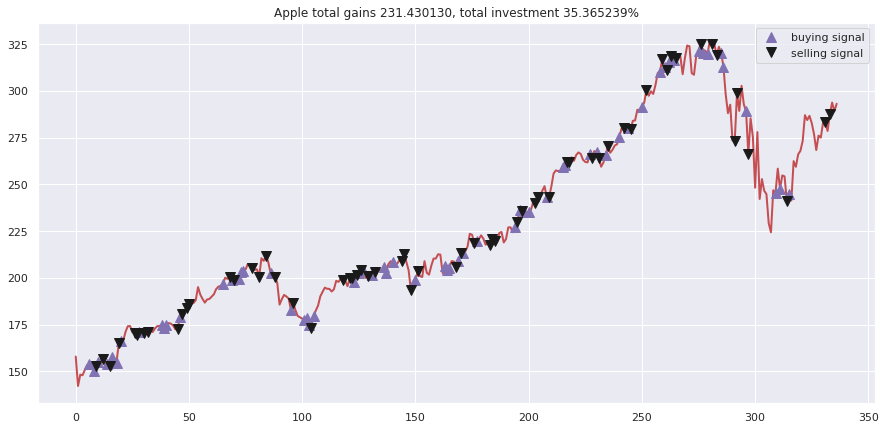

In [0]:
fig = plt.figure(figsize = (15, 7))
plt.plot(df['Close'], color='r', lw=2.)
plt.plot(df['Close'], '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(df['Close'], 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('Apple total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

# Real Time Strategy

In [0]:
from datetime import datetime

volume = df['Volume'].tolist()

for i in range(100):
    print(agent.trade([real_trend[i], volume[i]]))

[1. 0. 0.]
{'status': 'do nothing', 'action': 'nothing', 'balance': 694.7600250244141, 'timestamp': '2020-05-05 04:58:51.451043'}
[0. 1. 0.]
{'status': 'buy 1 unit, cost 142.190002', 'action': 'buy', 'balance': 552.5700225830078, 'timestamp': '2020-05-05 04:58:51.452189'}
[1. 0. 0.]
{'status': 'do nothing', 'action': 'nothing', 'balance': 552.5700225830078, 'timestamp': '2020-05-05 04:58:51.453207'}
[1. 0. 0.]
{'status': 'do nothing', 'action': 'nothing', 'balance': 552.5700225830078, 'timestamp': '2020-05-05 04:58:51.454966'}
[0. 0. 1.]
{'status': 'sell 1 unit, price 150.750000', 'investment': 6.020112111694463, 'gain': 8.55999755859375, 'balance': 703.3200225830078, 'action': 'sell', 'timestamp': '2020-05-05 04:58:51.456244'}
[0. 1. 0.]
{'status': 'buy 1 unit, cost 153.309998', 'action': 'buy', 'balance': 550.0100250244141, 'timestamp': '2020-05-05 04:58:51.458088'}
[0. 1. 0.]
{'status': 'buy 1 unit, cost 153.800003', 'action': 'buy', 'balance': 396.21002197265625, 'timestamp': '2020

# Copy Model

In [0]:

import copy
import pickle

copy_model = copy.deepcopy(agent.model)

with open('model.pkl', 'wb') as fopen:
    pickle.dump(copy_model, fopen)